### Problem 1 - Data Read, Write and Inspect:

Complete all following Task:

• Dataset for the Task: "bank.csv"

1. Load the provided dataset and import in pandas DataFrame.

2. Check info of the DataFrame and identify following:

(a) columns with dtypes=object

(b) unique values of those columns.

(c) check for the total number of null values in each column.

3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

4. Read ”banknumericdata.csv” and Find the summary statistics.

In [396]:
import pandas as pd;
import matplotlib.pyplot as plt;
%matplotlib inline
import seaborn as sns

In [397]:
bankData = pd.read_csv("./dataset-week2/bank .csv");
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [398]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [399]:
#colums with dtypes=object
objectDtypes = bankData.dtypes[bankData.dtypes == 'object'].index
objectDtypes

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [400]:
#unique values of those columns
for col in objectDtypes:
    print(bankData[col].unique())


['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


In [401]:
#another method to find the unique values of those cols
bankData.select_dtypes(include='object').nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

In [402]:
#check for the total number of null values in each column.
bankData.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [403]:
# either of the methods could be applied

# bankNumeric = bankData.drop(objectDtypes, axis=1)
bankNumeric = bankData.drop(bankData.select_dtypes(include='object').columns, axis=1)
bankNumeric.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [404]:
bankNumeric.to_csv('./dataset-week2/banknumericdata.csv', index=False)

In [405]:
bankNumericData = pd.read_csv('./dataset-week2/banknumericdata.csv')
bankNumericData.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [406]:
bankNumericData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   day       45211 non-null  int64
 3   duration  45211 non-null  int64
 4   campaign  45211 non-null  int64
 5   pdays     45211 non-null  int64
 6   previous  45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB


In [407]:
# finding summary stats
bankNumericData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Problem 2 - Data Imputations:

Complete all the following Task:

• Dataset for the Task: "medical_student.csv"

1. Load the provided dataset and import in pandas DataFrame.

2. Check info of the DataFrame and identify column with missing (null) values.

3. For the column with missing values fill the values using various techniques we discussed above. Try to explain why did you select the particular methods for particular column.

4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [408]:
medical_students_df = pd.read_csv('./dataset-week2/medical_students_dataset.csv')
medical_students_df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [409]:
medical_students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [410]:
medical_students_df.isnull().sum()

Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

In [411]:
# Explanation: filling in the missing value of 'Student ID' column with 0, since IDs cannot be missing, 0 is used as a placeholder
medical_students_df['Student ID'] = medical_students_df['Student ID'].fillna(0)
medical_students_df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,0.0,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [412]:
# fill the na for categorical values to be the mode of that col
# Explanation: The mode is chosen for filling categorical data as it represents the most frequent value,
# which is often the most reasonable assumption for missing entries in such columns.
for col in medical_students_df.select_dtypes('object').columns:
   mode = medical_students_df[col].mode()[0]
   medical_students_df[col] = medical_students_df[col].fillna(mode)

medical_students_df.isnull().sum()

Student ID            0
Age               20000
Gender                0
Height            20000
Weight            20000
Blood Type            0
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes              0
Smoking               0
dtype: int64

In [413]:
# for numerical columns fill them with the mean
# Explanation: The mean is chosen because it represents the central tendency of the data,
# and filling missing values with the mean is a common practice in numerical columns
for col in medical_students_df.select_dtypes('number').columns:
  mean = medical_students_df[col].mean()
  medical_students_df[col] = medical_students_df[col].fillna(mean)

medical_students_df.isnull().sum()

Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

In [414]:
# Check for duplicated values 
medical_students_df.duplicated().sum()

12572

In [415]:
# drop the duplicated values
medical_students_df.drop_duplicates(inplace=True)
medical_students_df.duplicated().sum()

0

## 3.2 Exercises
### Data Cleaning and Transformations with "Titanic Dataset":

Dataset Used: "titanic.csv"

Problem - 1:

Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’. Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean, median, maximum value, and minimum value of the ’Fare’ column?

In [416]:
titanic_df = pd.read_csv('./dataset-week2/Titanic-Dataset.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [417]:
pclass1_df = titanic_df[titanic_df['Pclass'] == 1][["Name", "Pclass", "Sex", "Age", "Fare", "Survived"]]
pclass1_df.head()

,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


In [418]:
# describing the fare col stats
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [419]:
# check for null values
pclass1_df['Age'].isnull().sum()

30

In [420]:
# using one hot encoding to convert the ’Embarked’ column into separate binary columns
dummies = pd.get_dummies(titanic_df['Embarked'])
dummies.columns = [f'Embarked_{col}' for col in dummies.columns]
dummies

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [421]:
titanic_df = pd.concat([titanic_df, dummies], axis=1)
titanic_df.drop('Embarked', axis=1, inplace=True)

In [422]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


### Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visualization to show how the survival distributions vary by gender.

In [423]:
# calculating the mean of the Survived column for different groups in Sex col
grouped_df = titanic_df.groupby('Sex')['Survived'].mean()
grouped_df.head()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Titanic Mean Survival Rate by Gender')

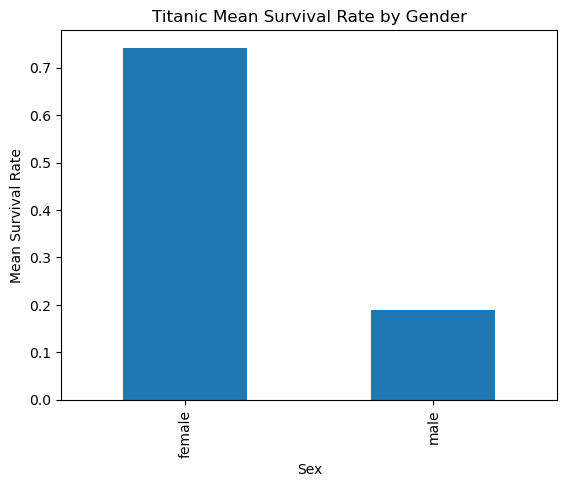

In [424]:
# plotting the bar chart
grouped_df.plot(kind='bar')
plt.ylabel('Mean Survival Rate')
plt.title('Titanic Mean Survival Rate by Gender')

### Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

In [425]:
embarked = titanic_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].sum()
embarked

Embarked_C    168
Embarked_Q     77
Embarked_S    644
dtype: int64

Text(0.5, 1.0, 'Count of Passengers by Port of Embarkation')

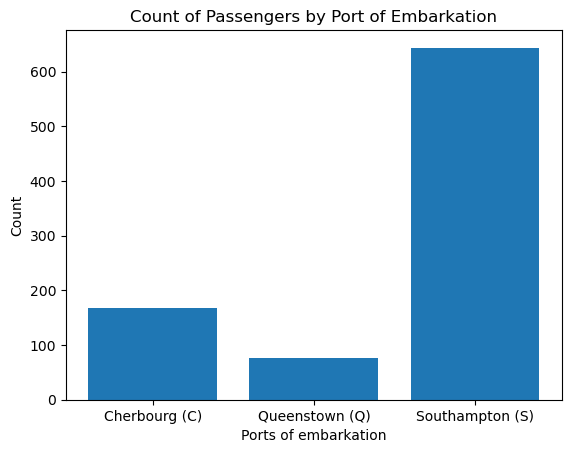

In [426]:
# Draw a bar plot
ports = ['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)']
plt.bar(ports, embarked.values)
plt.xlabel("Ports of embarkation")
plt.ylabel("Count")
plt.title("Count of Passengers by Port of Embarkation")

### Problem - 6{Optional}:

Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the ’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class and age group. Draw a visualization using a any plotting library to represent this graphically.

C:\Users\Admin\AppData\Local\Temp\ipykernel_22532\547190788.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = titanic_df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()


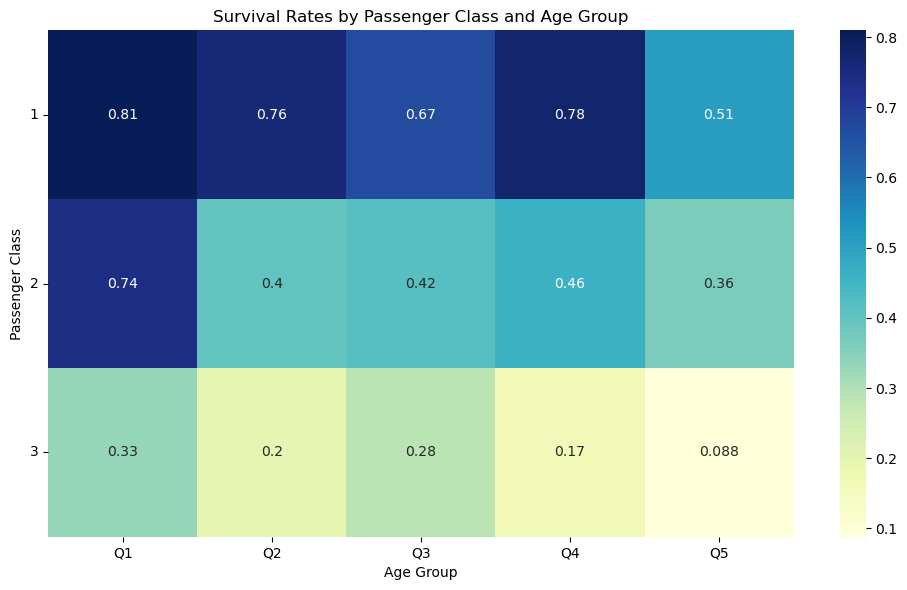

In [427]:
titanic_df['AgeGroup'] = pd.qcut(titanic_df['Age'].dropna(), q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])

# Compute mean survival rates by Pclass and AgeGroup
survival_rates = titanic_df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()

# Plotting the survival rates
plt.figure(figsize=(10, 6))
sns.heatmap(survival_rates, annot=True, cmap="YlGnBu")

# Add plot details
plt.title("Survival Rates by Passenger Class and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Passenger Class")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

In [428]:
print(survival_rates)

AgeGroup        Q1        Q2        Q3        Q4        Q5
Pclass                                                    
1         0.809524  0.761905  0.666667  0.777778  0.506667
2         0.742857  0.400000  0.416667  0.461538  0.363636
3         0.333333  0.197674  0.283582  0.166667  0.088235
